# Practical Basics of web scraping by Dr. Candace Makeda Moore, MD

## The following a pre-written look at web scraping  basics, in the form of a notebook to do analysis of entries on a website. The principles here can be applied across numerous websites. By the end of the notebook you should see that webscraping is easy and does not require paying exorbitant amounts for specialized software.

<div class="alert alert-danger">Must know critical concenpts are in red</div>

<div class="alert alert-warning"> <b>Some advanced commentary/note with practical implications</b>  </div>

<div class="alert alert-success"> <b>This notebook does not cover much esoteric material such as automata theory, or a deep explanation of the meaning of the internet. A few notes on theory are made only when very interesting or relevant. This is a practical notebook. In green are notes for beginners to programming. If you are a beginner to Jupyter, you should scroll through running EVERY SINGLE CELL. I put in a hyperlinked table of contents, but most notebooks build sequentially, so in order not to cause errors, just run every cell.</b>  </div>

The goals of this specific project include discussing the web, and a demo of scraping it. 

Contents:

- <a href='#the_destination0'>Step 0: Install and import libraries</a>
- <a href='#the_destination1'>Step 1: Let's talk web</a>
- <a href='#the_destination2'>Step 2: Let's actually scrape </a>
- <a href='#the_destination3'>Step 3: So what?</a>
- <a href='#the_destination4'>Step 4: Scrape multiple pages</a>
- <a href='#the_destination5'>Step 5: Explore what you scraped</a>

<a id='the_destination0'></a>
## Step 0. Install and import libraries 

I did not have every library installed in a place Jupyter could run them from. When I tried to run my code I realized I did not have plotly or wordcloud  so I will install them here:

In [88]:
!! pip install BeautifulSoup


['Collecting BeautifulSoup',
 '  Using cached https://files.pythonhosted.org/packages/40/f2/6c9f2f3e696ee6a1fb0e4d7850617e224ed2b0b1e872110abffeca2a09d4/BeautifulSoup-3.2.2.tar.gz',
 '    Complete output from command python setup.py egg_info:',
 '    Traceback (most recent call last):',
 '      File "<string>", line 1, in <module>',
 '      File "C:\\Users\\makeda\\AppData\\Local\\Temp\\pip-install-xjzg8xeu\\BeautifulSoup\\setup.py", line 3',
 '        "You\'re trying to run a very old release of Beautiful Soup under Python 3. This will not work."<>"Please use Beautiful Soup 4, available through the pip package \'beautifulsoup4\'."',
 '                                                                                                        ^',
 '    SyntaxError: invalid syntax',
 '    ',
 '    ----------------------------------------',
 'Command "python setup.py egg_info" failed with error code 1 in C:\\Users\\makeda\\AppData\\Local\\Temp\\pip-install-xjzg8xeu\\BeautifulSoup\\']

<div class="alert alert-success"> <b>Your machine may not have the same libraries on it as my machine. Changes are if you lack programming skills, you have a machine with few things installed other than the operating system and programs. Generally speaking, you will then have to check what you have. I suggest you find a nerdy friend who writes command line, and loves infrastructure issues, and have them check. Command line is text that you usually write into a command line interface</b>  </div>

<div class="alert alert-success">If you find your code failing (producing errors), double down on what I wrote above.</div>

Next I load my basic data and webscraping libraries/packages that I like:

In [89]:
# the libraries important to webscrape

from bs4 import BeautifulSoup

import requests

In [90]:
# step to load up the right libraries
# although this can vary we will probably always use pandas, numpy, re, nltk and matplotlib 

#fundamental data analytics libraries and packages
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [91]:
# NLP libraries and packages
import re
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
# we will need some specific functions from nltk to tokenize stuff.
from nltk.tokenize import sent_tokenize, word_tokenize 

In [5]:
#fancy visualization and other fancy libraries and packages
from wordcloud import WordCloud,STOPWORDS
from collections import Counter

import datetime as dt
from IPython.display import Markdown, display
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import seaborn as sns

In [6]:
#import advanced analytics and NLP packages
import scipy
from scipy import stats as st
#from sklearn.feature_extraction.text import CountVectorizer


<a id='the_destination1'></a>
## Step 1. Let's talk web

<div class="alert alert-warning">Tim Berners-Lee and other geniuses at CERN, invented a lot of what we now know as the web. They came up with HTML, HTTP and browsers. Browsers were software to view web documents- which were written in HTML.The rules for transferring files are HTTP (Hypertext Transfer Protocol) although technically the majority of websites today use an enhanced data transfer protocol called HTTPS, it's built on the same ideas with more security.  Tim Berners-Lee's first browser was called WorldWideWeb, sound familiar?</div>

<div class="alert alert-danger">To get a website we use a function convenniently called get. </div>

<div class="alert alert-success">These days websites are really complicated. As an example I'll use a page on Radiopaedia. After reading about 30 lines you will see my point, and you may want to just scroll down to the next cell.</div>

In [7]:
import requests
URL='https://radiopaedia.org//encyclopaedia/all/all?lang=us'  #https://radiopaedia.org/encyclopaedia/all/
req = requests.get(URL)

print(req.text)

<!DOCTYPE html>

<html lang="en-US">
<head>
  <meta charset="utf-8">

  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta name='svg-x-verification' content='48e9d9559ad07a2808d130ec4755503bfa7af2d9'/>
  <title>Articles | Radiopaedia.org</title>
  
  
  
  
  
    <meta name="robots" content="" />

  <link rel="apple-touch-icon-precomposed" href="https://prod-assets-static.radiopaedia.org/assets/apple-touch-icon-precomposed-85b12b5f6a2dbe4b308242a52b900b97c3c3d4623199c03dccd0e084d6868aa0.png">
    <meta name="twitter:card" content="summary">
    <meta name="twitter:site" content="@radiopaedia">
    <meta name="twitter:title" content="Articles | Radiopaedia.org">

    <meta name="og:site_name" content="Radiopaedia">
    <meta name="og:title" content="Articles | Radiopaedia.org">

  <link rel="alternate" hreflang="en-GB" href="https://radiopaedia.org//encyclopaedia/all/all?lang=gb" />
  <link rel="alternate" hreflang="en-US" href="https://radiopaedia.org//encycl

As you can see it appears. Although the code is very long there is a structure that organizes how it appears in a browser. The web has come a long way since it's old days back when I would write web pages by hand. 

Imagine I just needed to check for a word...easy task. Use the re library. In the specific case let's look for anything that starts with antenatal:

In [8]:
# example with antenatal as word
req_text = requests.get(URL).text
found_FOAM = re.findall('antenatal[\w \- \%]*',req_text)
print("The number of times a word that start with antenatal appears are:",len(found_FOAM))
print("The antenatal appears as :",found_FOAM)

The number of times a word that start with antenatal appears are: 4
The antenatal appears as : ['antenatal-scan', 'antenatal scan', 'antenatal ', 'antenatal screening']


OK, so pulling words off one by one is laborious. We can use a structure to find things. This is what BeautifulSoup is all about.

<a id='the_destination2'></a>
## Step 2: Scraping



Time to get information out of the web, or at least a page in an orderly fashion. This is where we use beautifull soup. I'll just scrape a random div tag to show my point. 

In [69]:
soup = BeautifulSoup(req.text, 'lxml')
path_info = []
for row in soup.find_all('div', attrs ={'class':'search-result-body'}):
    path_info.append(row.text)
    
scraped_pathologies= pd.DataFrame( path_info, columns=['pathology_details']) # DataFrame with the data on product names and prices
#products_data = products_data.reset_index()# name_products, price,

print(scraped_pathologies.tail(5))   

                                    pathology_details
88  \nA mnemonic used for abnormal collection of b...
89  \nAbnormal ductus venosus waveforms can arise ...
90  \nAbnormal intra-abdominal gas is an important...
91  \nAn eccentrically-located gestational sac tow...
92  \nAn abnormally low sac position can result fr...


So we got stuff on the web, and organized it. We can put it into a csv for other or us to do analysis of.

In [10]:
scraped_pathologies.to_csv('scraped_pathologies.csv')

Ok, but it stopped where the webpage stops...this is a synamic list and we would probably want to scrape more. We can. 

<a id='the_destination3'></a>
## Step 3: So what anyways?

<div class="alert alert-warning">There is a LOT of data online, but not neccesarily organized in a convenient way. Lets say I want to buy filament for my 3D printer. I go to a website that has 29 types listed. I want the best one for my machine at the best price with a few other conditions. I can read all 29 entries, or I can scrape the data, throw it in a csv and do some anaytics. Big companies use these technologies of scraping and NLP to pull data from forums and social media for thier own nefarious purposes. But it's notable right now that social media may help us fight infectious disease or in the worst cases spread disiniformation. COVID spawned an 'infodemic' of nonsense anti-information. It is in everyone's interest to understand how this happened so we can stop it next time. And really, next time is already here. Every day people spread disinformation about health and medicine. Could webscraping help us stop it? It dould provide raw data to understand the problem. </div>

<a id='the_destination4'></a>
## Step 4: Multiple page scraping

In [52]:
pages = range(1,158,1)
path_info_all= []
for page in pages:

    page = requests.get("https://radiopaedia.org/encyclopaedia/all/all?lang=us&page=" + str(page))

    soup = BeautifulSoup(page.text, 'html.parser')

    
 

    for row in soup.find_all('div', attrs ={'class':'search-result-body'}):
        path_info_all.append(row.text)
    
        scraped_all_pathologies= pd.DataFrame( path_info_all, columns=['pathology_details']) # DataFrame with the data on product names and prices
#products_data = products_data.reset_index()# name_products, price,

print(scraped_all_pathologies.head(6))   

                                   pathology_details
0  \n11-13 week antenatal (nuchal translucency) s...
1  \n≤11 ribs is associated with a number of cong...
2  \nThe 1-2-3 rule is a simple aide-mémoire desc...
3  \n14-3-3 proteins are found in the cerebrospin...
4  \nComparing 1.5 T vs 3.0 T  (1.5 tesla vs 3.0 ...
5  \n18q-deletion syndrome is a rare chromosomal ...


In [53]:
 print(scraped_all_pathologies.tail(5))   

                                       pathology_details
14538  \nThe zygomaticomaxillary suture is between th...
14539  \nThe zygomaticotemporal foramen is a small fo...
14540  \nThe zygomaticotemporal nerve is the larger o...
14541  \nThe zygomaticus major muscle is a member of ...
14542  \n\nThe zygomaticus minor muscle is a member o...


<a id='the_destination5'></a>
## Step 5: Explore through NLP, stats and visualization

In [54]:
scraped_all_pathologies.to_csv('scraped_all_pathologies.csv')

In [55]:
data_for_nlp= pd.read_csv('scraped_all_pathologies.csv')
def printmd(string):
    display(Markdown(string))
    
printmd('**Tweet info(original csv file)**')
data_for_nlp.tail(5).style.set_properties(**{'background-color': 'pink',                                                   
                                    'color': 'blue',                       
                                    'border-color': 'white'})

**Tweet info(original csv file)**

,Unnamed: 0,pathology_details
14538,14538,The zygomaticomaxillary suture is between the zygomatic process of the maxilla and the maxillary process of the zygomatic bone. They are often involved in zygomaticomaxillary complex (ZMC) fractures.
14539,14539,The zygomaticotemporal foramen is a small foramen in the anteromedial surface of the zygomatic bone that transmits the zygomaticotemporal nerve (a branch of the zygomatic nerve from the maxillary division of the trigeminal nerve) and zygomaticotemporal vessels.
14540,14540,"The zygomaticotemporal nerve is the larger of the two branches of the zygomatic nerve, from the maxillary division of the trigeminal nerve. It is primarily sensory but also relays parasympathetic fibers to the lacrimal nerve from the pterygopalatine ganglion which reach the lacrimal gland. Along..."
14541,14541,"The zygomaticus major muscle is a member of the buccolabial muscle group of the upper lip1. It joins with the fibers of levator anguli oris, orbicularis oris and the more deeply placed muscular bands to move the side of the mouth upwards and sideways during facial movements such as laughing. Su..."
14542,14542,"The zygomaticus minor muscle is a member of the buccolabial muscle group of the muscles of facial expression. Together with the levator labii superioris alaeque nasi and levator labii superioris muscles it is one of the main elevators of the lip, exposing the maxillary teeth 1. Along with its o..."


In [56]:
print("This dataframe is", len(data_for_nlp), "rows long")

This dataframe is 14543 rows long


In [57]:
english_stemmer = SnowballStemmer('english') 

In [58]:
text = data_for_nlp.pathology_details[20]

words_in_sample = nltk.word_tokenize(text)
print(words_in_sample) 

['The', '5', 'Gauss', 'line', 'is', 'the', 'safety', 'line', 'drawn', 'around', 'the', 'perimeter', 'of', 'the', 'main', 'magnet', 'of', 'the', 'MR', 'scanner', ',', 'specifying', 'the', 'distance', 'at', 'which', 'the', 'stray', 'magnetic', 'field', 'is', 'equivalent', 'to', '5', 'Gauss', '(', '0.5', 'mT', ')', '.', '5', 'Gauss', 'and', 'below', 'are', 'considered', "'safe", "'", 'levels', 'of', 'static', 'magnetic', 'field', 'exposure', 'for', 'the', 'general', 'publ', '...']


In [59]:
# word count will be an object created by calling constructor of class Counter
word_count = Counter()
for row in data_for_nlp[['pathology_details']].iterrows():
    tokenized = nltk.word_tokenize(row[1][0])
    word_count += Counter(tokenized)
#print(word_count)
word_count_dict = dict(word_count)
word_count_df = pd.DataFrame.from_dict({
    'words': list(word_count_dict.keys()), 
    'count': list(word_count_dict.values())
})
print(word_count_df)

                     words  count
0                    11-13      2
1                     week     33
2                antenatal     32
3                        (   9936
4                   nuchal     14
5             translucency      3
6                        )   9381
7                     scan     86
8                       is  18588
9               considered    534
10                       a  15737
11                 routine     53
12           investigation     42
13                 advised      3
14                     for   3200
15                     the  38151
16                   fetal    389
17              well-being      4
18                      as   5204
19                    well    272
20                   early    192
21               screening     50
22                      in  10999
23               pregnancy    246
24                     see    165
25                       .  23893
26                      It   4636
27                includes    167
28            

In [60]:
words_by_number = word_count_df.sort_values('count', ascending = False)
print(words_by_number.head(35))

            words  count
15            the  38151
45             of  28826
25              .  23893
50              ,  18779
8              is  18588
10              a  15737
30            and  14251
39            ...  13599
102            to  11698
22             in  10999
3               (   9936
6               )   9381
71            The   8046
38            are   6365
52              :   5774
18             as   5204
43           with   5130
200            or   4975
26             It   4636
344            an   3572
324            be   3358
303          that   3268
14            for   3200
405          from   3008
206            by   2868
365           can   2826
33             on   2678
283          also   2540
319         which   2248
210  Epidemiology   1895


In [61]:
all_data_inside_row = ''
for data_inside_row in data_for_nlp[['pathology_details']].iterrows():
    redo_row = re.sub(r'[^\w\s]', '', data_inside_row[1][0])
    all_data_inside_row += redo_row
    

#word_count1 = Counter()

tokenized_new = nltk.word_tokenize(all_data_inside_row)

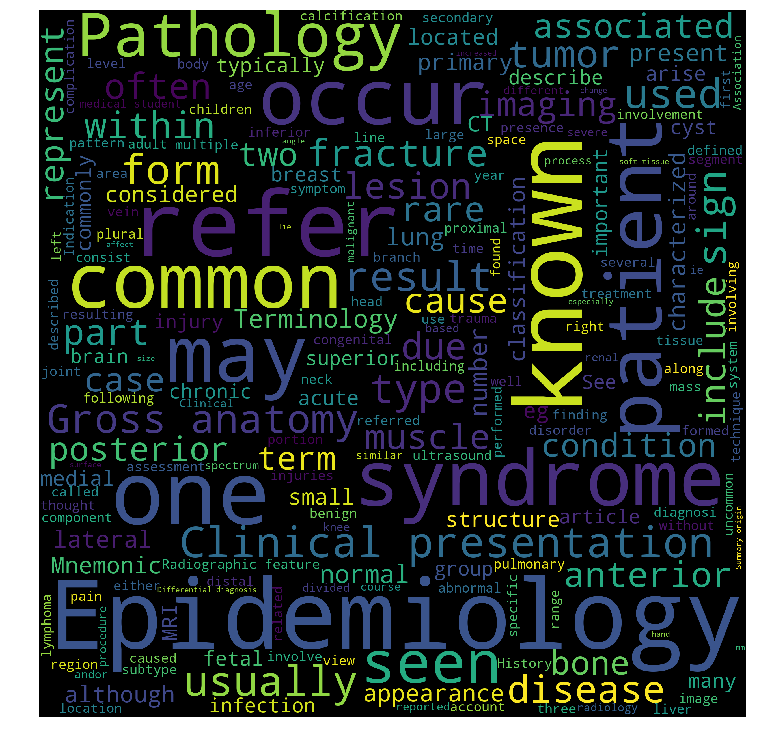

In [62]:


def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'black',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

showWordCloud(tokenized_new)    

Looks pretty but, very imprecise...Let's put all the text together, then count up words, the bar graph it in style.

In [63]:

def word_count(str):
    counts = dict()
    words_here = str.split()

    for word in words_here:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts
punct_free =  word_count(all_data_inside_row)
#print( word_count(all_data_inside_row))

We can isolate the top words by using head if we put the list in reverse ascending order by value of count.

In [73]:
word_count_dict_no_punct = dict(punct_free)
word_count_df_no_punct = pd.DataFrame.from_dict({
    'words': list(word_count_dict_no_punct.keys()), 
    'count': list(word_count_dict_no_punct.values())
})


sorted = word_count_df_no_punct.sort_values('count', ascending= False)
top_sorted= sorted.head(50)


In [75]:
layout = dict(
    title='Common words in Radiopaedia Articles',
    yaxis=dict(
        title='numbers',
        tickformat=',',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=top_sorted['words'],
    y=top_sorted['count']
))

iplot(fig)

In [82]:
refined_sorted= sorted[23:75]

In [86]:
layout = dict(
    title='Refined (no top stopwords) common words on Radiopaedia Articles',
    yaxis=dict(
        title='numbers',
        tickformat=',',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=refined_sorted['words'],
    y=refined_sorted['count']
))

iplot(fig)